### Step 1: Importing Libraries

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Reading and understanding dataset

In [391]:
df_bike_sharing = pd.read_csv("Day.csv")

In [392]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [393]:
#checking dataset shape
df_bike_sharing.shape

(730, 16)

In [394]:
#checking dataset infor
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [395]:
#Getting general insights of numerical data
df_bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [396]:
#checking the size of dataset
df_bike_sharing.size

11680

In [397]:
#checking datatypes
df_bike_sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### There are no null values in dataset. Hence Null value imputation will not be required

### Step 3: Cleaning the dataset
 #### Dropping Columns which are not required
 
        Dropping instant column it is just a row identifier
        Dropping dteday column as there are other columns which give the same information like yrm mnth, weekday
        Dropping Casual and Registered variables because they are part of target variable cnt. So we cannot use them for prediction.

In [398]:
df_bike_sharing.drop(['instant','dteday','registered','casual'], axis = 1, inplace = True)

In [399]:
#Inspecting dataset after dropping
df_bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [400]:
df_bike_sharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [367]:
#Features like season, mnth, weekday and  weathersit are integers although they should be categorical.

#### Handle Missing values
As seen before there are no missing values in Dataset

#### Handling Outliers

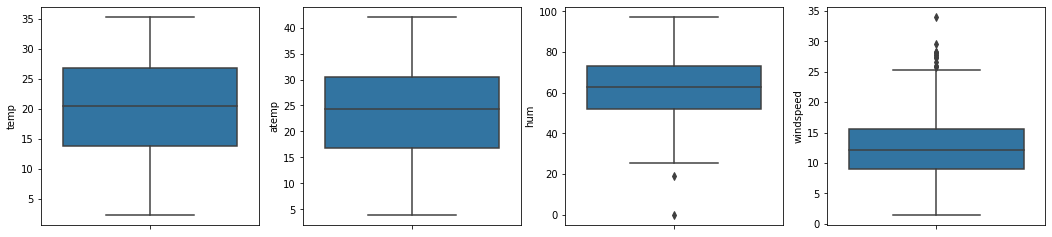

In [234]:
#Using box plot to check outliers for numerical variables

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_bike_sharing)
    i+=1

#### There are no outliers which needs to be handled

### Step 4: EDA
First we will convert all required numerical variable to categorical variable

In [401]:

# Changing variable to Categorical to create dummy variables
df_bike_sharing['season'] = df_bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bike_sharing['mnth'] = df_bike_sharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
df_bike_sharing['weekday'] = df_bike_sharing['weekday'].map({0:'sun',1:'mon', 2:'tues', 3:'wed', 4:'thus', 5:'fri',6:'sat'})
df_bike_sharing['weathersit'] = df_bike_sharing['weathersit'].map({1:'clear', 2:'mist', 3:'lightsnow', 4:'heavyrain'})


In [402]:
df_bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thus,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Drawing pairplot to see any relationships in data

<Figure size 1080x2160 with 0 Axes>

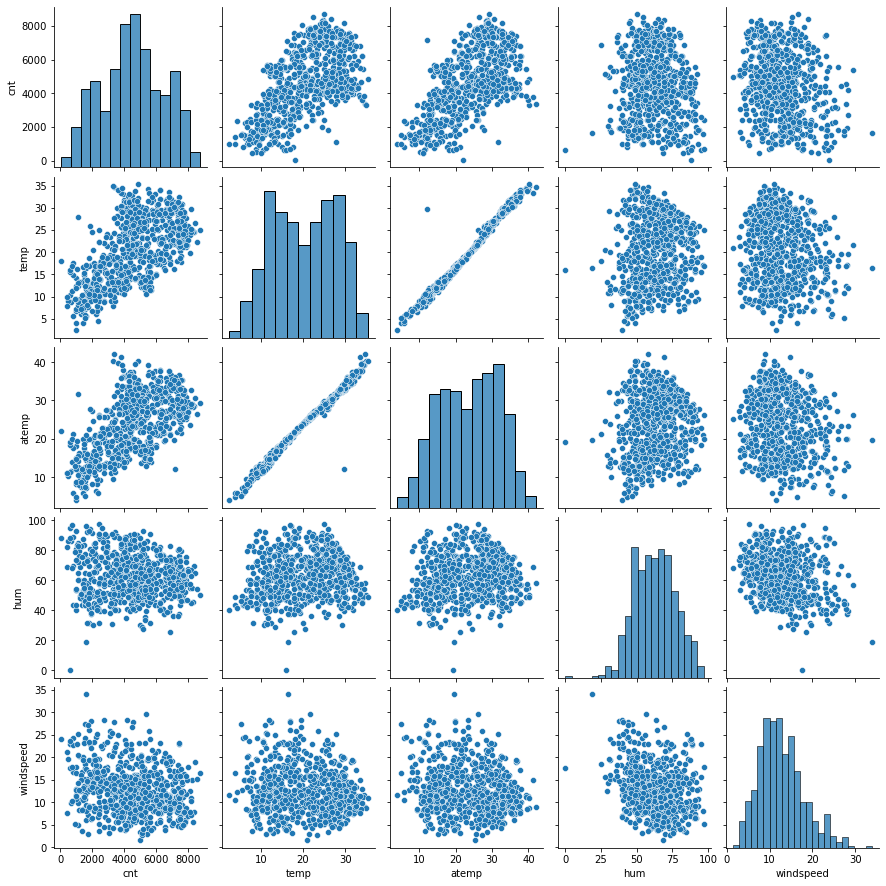

In [242]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bike_sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 1440x1080 with 0 Axes>

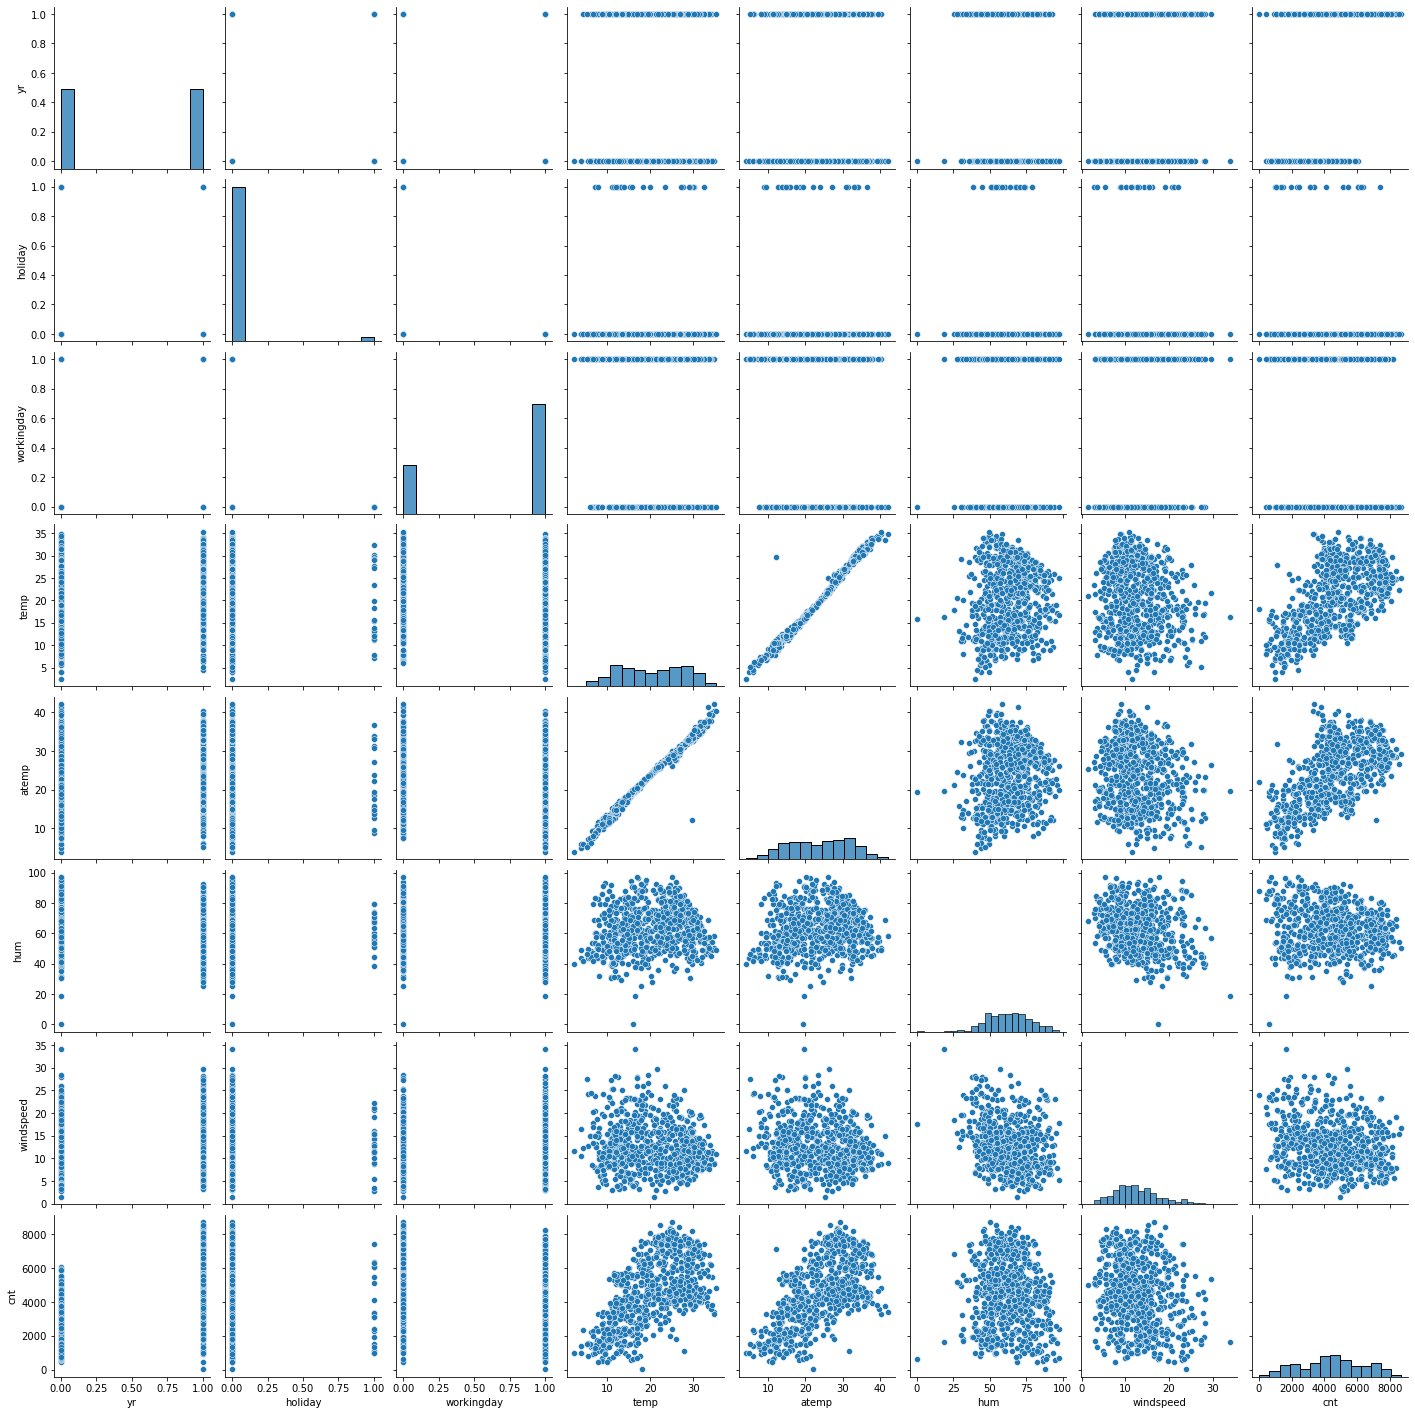

In [244]:
plt.figure(figsize=(20,15))
sns.pairplot(df_bike_sharing)
plt.show()

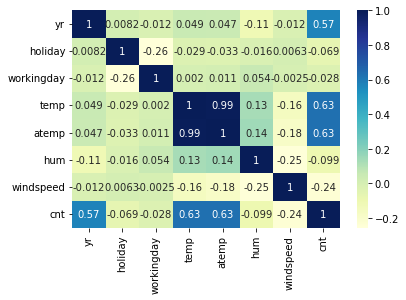

In [246]:
#Checking correlations of numerical variables
cor=df_bike_sharing.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

Dependent variable count has linear relationship with few of the variable. Which is a good indication to proceed for Linear model.

#### Analysing Categorical Variabels with target variables

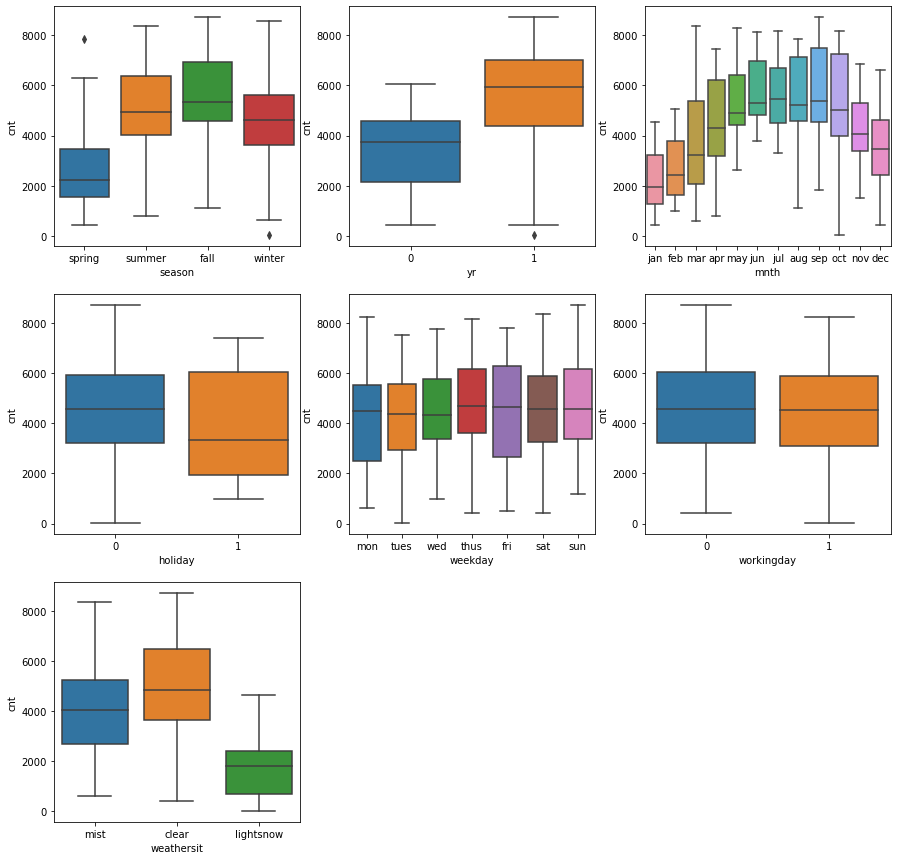

In [249]:
# Drawing Boxplot
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df_bike_sharing, x=i[1], y='cnt')
plt.show()

1. Sales are maximum during fall which is also indicated by mnth feature
2. Sales have increased from 2018 to 2019
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. Demand decreases on holiday.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

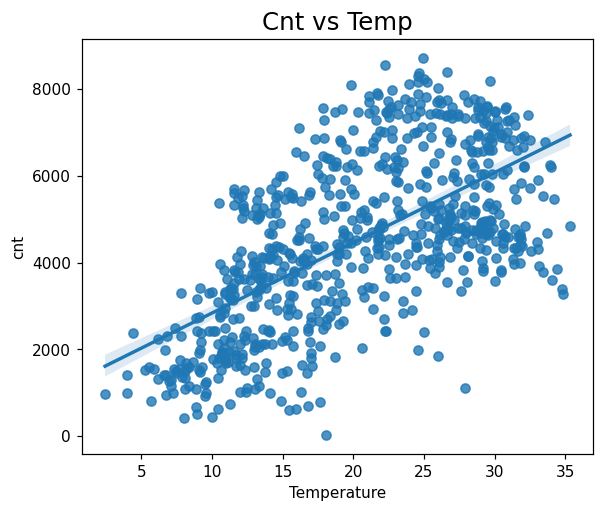

In [250]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df_bike_sharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Bike demand is positively correlated with Temperature

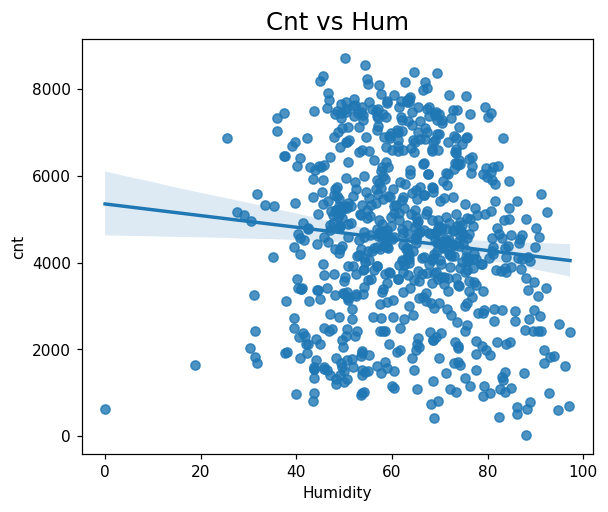

In [251]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df_bike_sharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Cnt decreases with humidity but there is not much impact

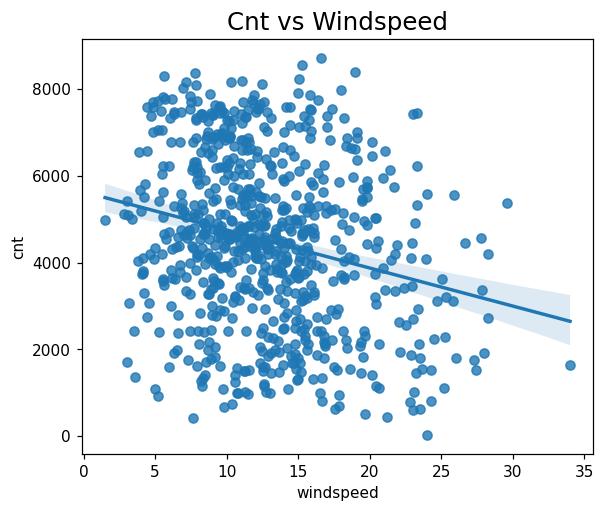

In [253]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df_bike_sharing,y="cnt",x="windspeed")
plt.show()

Cnt decreases with windspeed however data is very scaterred

### Step 5. Data Preparation for Linear Regression

Dummy Variable Creation

In [403]:
# Droping the first column from status df using 'drop_first = True'

season = pd.get_dummies(df_bike_sharing['season'], drop_first = True)

# Add the results to the original df_bike_sharing dataframe

df_bike_sharing = pd.concat([df_bike_sharing, season], axis = 1)

# Droping 'season' as we have created the dummies for it

df_bike_sharing.drop(['season'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

df_bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,tues,1,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,thus,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [404]:
# Droping the first column from status df using 'drop_first = True'

season = pd.get_dummies(df_bike_sharing['mnth'], drop_first = True)

# Add the results to the original df_bike_sharing dataframe

df_bike_sharing = pd.concat([df_bike_sharing, season], axis = 1)

# Droping 'season' as we have created the dummies for it

df_bike_sharing.drop(['mnth'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

df_bike_sharing.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tues,1,mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thus,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [405]:
# Let's drop the first column from status df using 'drop_first = True'

weathersit = pd.get_dummies(df_bike_sharing['weathersit'], drop_first = True)

# Add the results to the original df_bike_sharing dataframe

df_bike_sharing = pd.concat([df_bike_sharing, weathersit], axis = 1)

# Droping 'weathersit' as we have created the dummies for it

df_bike_sharing.drop(['weathersit'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

df_bike_sharing.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,jan,jul,jun,mar,may,nov,oct,sep,lightsnow,mist
0,0,0,mon,1,14.110847,18.18125,80.5833,10.749882,985,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,tues,1,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,wed,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,thus,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,fri,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,0,0,0,0


In [406]:
# Let's drop the first column from status df using 'drop_first = True'

weekday = pd.get_dummies(df_bike_sharing['weekday'], drop_first = True)

# Add the results to the original df_bike_sharing dataframe

df_bike_sharing = pd.concat([df_bike_sharing, weekday], axis = 1)

# Droping 'weekday' as we have created the dummies for it

df_bike_sharing.drop(['weekday'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.

df_bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,lightsnow,mist,mon,sat,sun,thus,tues,wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [407]:
from sklearn.model_selection import train_test_split

# #Train Test split with 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 42)

In [408]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'lightsnow', 'mist', 'mon',
       'sat', 'sun', 'thus', 'tues', 'wed'],
      dtype='object')

In [409]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'lightsnow', 'mist', 'mon',
       'sat', 'sun', 'thus', 'tues', 'wed'],
      dtype='object')

In [410]:
# Checking shape and size after split
print(df_test.shape)
print(df_train.shape)

(219, 30)
(510, 30)


### Rescaling Continious Features using Min-Max scaling

In [411]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [412]:
scaler = MinMaxScaler()

In [413]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 683 to 435
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  aug         510 non-null    uint8  
 12  dec         510 non-null    uint8  
 13  feb         510 non-null    uint8  
 14  jan         510 non-null    uint8  
 15  jul         510 non-null    uint8  
 16  jun         510 non-null    uint8  
 17  mar         510 non-null    uint8  
 18  may         510 non-null    uint8  
 19  nov         510 non-null   

In [414]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed' ]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


C:\Users\adity\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [415]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,lightsnow,mist,mon,sat,sun,thus,tues,wed
683,1,0,1,0.327133,0.322150,0.639330,0.327101,5445,0,0,...,0,0,0,1,0,0,0,0,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,5478,0,0,...,1,0,0,1,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,5020,0,1,...,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1162,1,0,...,0,0,0,1,0,0,0,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,7572,0,0,...,1,0,0,1,0,0,0,1,0,0


In [416]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,lightsnow,mist,mon,sat,sun,thus,tues,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.551091,0.526680,0.653801,0.414566,4557.639216,0.231373,0.256863,...,0.090196,0.090196,0.029412,0.345098,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333
std,0.500025,0.163554,0.459559,0.227401,0.213153,0.143542,0.185671,1937.436761,0.422124,0.437332,...,0.286744,0.286744,0.169124,0.475867,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,3296.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,4591.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,6039.250000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [417]:
y_train = df_train.pop('cnt')
X_train = df_train

In [418]:
y_test = df_test.pop('cnt')
X_test = df_test

In [447]:
X_train_lm = X_train.drop('atemp', axis=1)

#### Eliminating features using RFE

In [453]:
#Chosing important features using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_lm,y_train)

rfe = RFE(lr,15)
rfe.fit(X_train_lm,y_train)

print(rfe.support_) 
print(rfe.ranking_)


[ True  True False  True  True  True  True False  True False  True False
 False  True False  True  True  True False  True  True  True False False
 False False False False]
[ 1  1 10  1  1  1  1  6  1  8  1  7 14  1 11  1  1  1  2  1  1  1  3 12
  9 13  5  4]


C:\Users\adity\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [457]:
columns_to_remove = X_train_lm.columns.values[np.logical_not(rfe.support_)]
columns_to_remove

array(['workingday', 'summer', 'aug', 'feb', 'jan', 'jun', 'oct', 'mon',
       'sat', 'sun', 'thus', 'tues', 'wed'], dtype=object)

In [461]:
#Keeping only features selected by RFE
X_train_rfe = X_train_lm.drop(columns=columns_to_remove)

In [462]:
X_train_rfe.shape

(510, 15)

In [463]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jul', 'mar', 'may', 'nov', 'sep', 'lightsnow', 'mist'],
      dtype='object')

##### Creating functions for Manual Elimination

In [464]:
# Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Creating a function to check VIF

In [465]:
# Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    vif = pd.DataFrame()
    df1 = X_train[cols]
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Step 6: Model Building

Model 1

In [466]:
#Buliding model using top 15 features returned by RFE

In [468]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jul', 'mar', 'may', 'nov', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.48e-186
Time:                        22:27:22   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3249.1935    301.238     10.786      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 2

Dropping may as it has high p value

In [470]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jul', 'mar', 'nov', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.32e-186
Time:                        22:29:50   Log-Likelihood:                -4117.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3284.7495    302.120     10.872      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 3

Dropping hum as it has high VIF and negative effect

In [471]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'dec',
       'jul', 'mar', 'nov', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          6.15e-184
Time:                        22:30:33   Log-Likelihood:                -4125.2
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2521.4390    235.201     10.720      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 4

Dropping Holiday as it has P value

In [472]:
cols = ['yr', 'temp', 'windspeed', 'spring', 'winter', 'dec',
       'jul', 'mar', 'nov', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.21e-183
Time:                        22:31:07   Log-Likelihood:                -4129.3
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2496.4072    236.690     10.547      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 5

Dropping windspeed as it has VIF

In [473]:
cols = ['yr', 'temp', 'spring', 'winter', 'dec',
       'jul', 'mar', 'nov', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.07e-181
Time:                        22:32:24   Log-Likelihood:                -4136.8
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2052.6604    209.468      9.799      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 6

Dropping dec it has same VIF and p-value as sep but is negatively corrrelated

In [474]:
cols = ['yr', 'temp', 'spring', 'winter',
       'jul', 'mar', 'nov', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.91e-180
Time:                        22:36:10   Log-Likelihood:                -4142.3
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     499   BIC:                             8353.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1922.5002    207.780      9.253      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 7

Dropping nov


In [476]:
cols = ['yr', 'temp', 'spring', 'winter',
       'jul', 'mar', 'sep', 'lightsnow', 'mist']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.35e-179
Time:                        22:37:52   Log-Likelihood:                -4148.0
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1758.5385    203.934      8.623      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [477]:
# All the features now have acceptable p-value and vif

In [478]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [479]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp', 'spring', 'winter',
       'jul', 'mar', 'sep', 'lightsnow', 'mist']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1758.5385368278667 [ 1994.43310598  3959.83623111 -1241.04824563   521.39049998
  -478.76349509   545.54158985   495.12261917 -2318.04600305
  -677.10100607]


### Step 7: Model Evaluation

#### Residual Analysis


In [480]:
y_train_pred = lr.predict(X_train[cols])

In [481]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


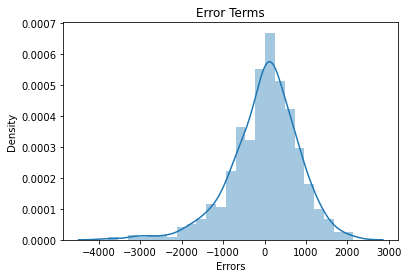

In [482]:
plot_res_dist(y_train, y_train_pred)

In [483]:
# Errors are normallly distributed with 0 Mean

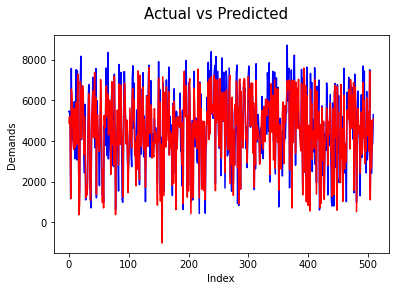

In [484]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [485]:
# Actual and Predicted follow almost same pattern which is a good sign

In [486]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8186984164201125

In [487]:
# R2 is same is seen in the final Model

In [488]:
#Checking Linearity using scatter plot

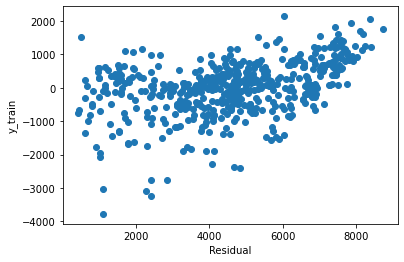

In [489]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predicting Values using test data

In [490]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [491]:
cols = ['yr', 'temp', 'spring', 'winter',
       'jul', 'mar', 'sep', 'lightsnow', 'mist']


#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [492]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8069362632237265

Verifying Homecasdescity

Text(0, 0.5, 'y_test_pred')

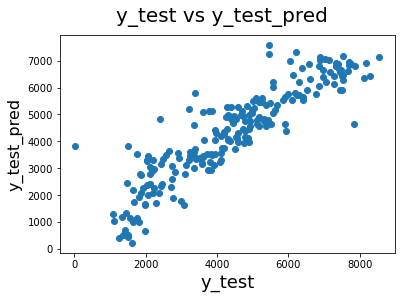

In [493]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)


Homocasdescity assumption is verified with above plot

In [501]:
#Plotting error term for test Data
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)        

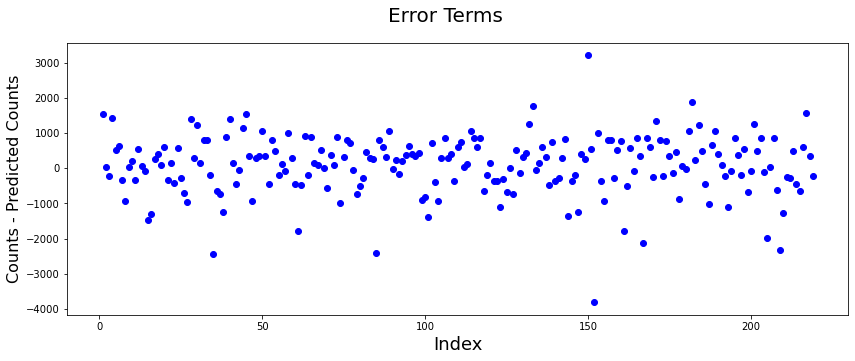

In [495]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

In [496]:
#Error terms are randomly distributed which is a good sign

### Step 8: Making Predictions

In [315]:
#Model Interpretation

In [497]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'temp', 'spring', 'winter',
       'jul', 'mar', 'sep', 'lightsnow', 'mist']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.35e-179
Time:                        22:40:05   Log-Likelihood:                -4148.0
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1758.5385    203.934      8.623      0.0

C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


- Company should focus on expanding business during Spring.
-  Company should focus on expanding business during March and September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

Most significant features for prediction are

- Year(2019)
- Temperature
- Month(jul, mar, sep)
- Season(spring, winter)
- Wheathersit(lightsnow', 'mist) 
- Holiday
- Humidity
- Windspeed